### Import des packages que nous allons utiliser au cours de ce notebook

In [6]:
%matplotlib inline


In [7]:
import matplotlib
import matplotlib.pyplot as plt, mpld3
from matplotlib.ticker import FuncFormatter
from mpld3 import plugins
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 250)
pd.set_option('precision', 0)

In [8]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

Nous importons le package d'OpenFisca-France ainsi que certains sous-packages spécifiques nécessaire à l'exécution du notebook.

In [9]:
#Specific usage imports
from openfisca_core import periods, rates
import openfisca_france

Nous importons le `tax-benefit-system` et créons des fonctions afin de simuler des scénarios (ou cas types) qui nous servirons pour les simulations.

In [10]:
tax_benefit_system = openfisca_france.FranceTaxBenefitSystem()

In [22]:
ax_variable_max = 280000
ax_variable_min = 30_000
count = 10000

year_lag_max = 4
def make_scenario(year = 2013,tax_benefit_system = tax_benefit_system):
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        period = year,
        parent1 = dict(
            age = 40,
            salaire_de_base = 10**6,
            ppe_du_sa = 6020, 
            statut_marital = u"celibataire" ,
            ),
        menage = dict(
            loyer = 12000,
            statut_occupation_logement = "locataire_vide",
            depcom = 13012,
            ),
    )
    return scenario
        
        


In [24]:
simulation = make_scenario().new_simulation()

In [27]:
simulation.calculate("revenus_nets_du_travail", 2013)

array([897730.9], dtype=float32)

In [12]:
#avantage_qf_2011 = simulation_dict[6][2011].calculate("avantage_qf", period = 2011)
#avantage_qf_2013 = simulation_dict[6][2013].calculate("avantage_qf", period = 2013)
#print(avantage_qf_2011[104])
#print(avantage_qf_2013[104])
#print(avantage_qf_2011[104]-avantage_qf_2013[104])
#print((avantage_qf_2011-avantage_qf_2013)[104])
#print((simulation_dict[6][2011].calculate_add("avantage_qf", period = 2011)- \
#      simulation_dict[6][2014].calculate_add("avantage_qf", period = 2014))[104])

In [26]:
source_dict_2011 = dict()
for child in range(6):
    avantage_qf_2011 = simulation_dict[child][2011].calculate("avantage_qf", period = 2011)
    avantage_qf_2013 = simulation_dict[child][2013].calculate("avantage_qf", period = 2013)
    reform_cost = avantage_qf_2011 - avantage_qf_2013
    revdisp = simulation_dict[child][2013].calculate("revenu_disponible", period = 2013)
    share_of_disposable_income = reform_cost/revdisp
    df = pd.DataFrame({'rbg':simulation_dict[child][2011].calculate("rbg", period = 2011),
                       'irpp': - simulation_dict[child][2011].calculate("irpp", period = 2011),
                       'decote':  simulation_dict[child][2011].calculate("decote_gain_fiscal", period = 2011),
                       'avantage_qf':simulation_dict[child][2011].calculate("avantage_qf", period = 2011),
                       'avantage_qf_2013':simulation_dict[child][2013].calculate("avantage_qf", period = 2013),
                       'child_number':simulation_dict[child][2013].calculate_add("nb_pac", period = 2013),
                       'reform_cost': reform_cost,
                       'share_of_D_income': share_of_disposable_income*100,
                      })
    source = ColumnDataSource(data=df)
    source_dict_2011[child] = source

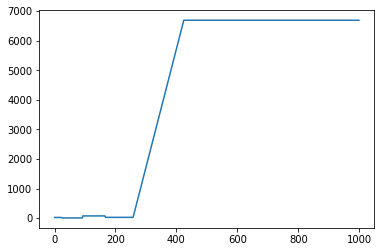

In [24]:
plt.plot(reform_cost)

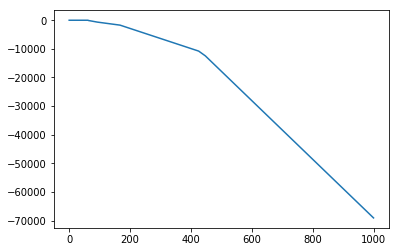

In [30]:
plt.plot(simulation_dict[child][2011].calculate("impots_directs", period = 2011))

In [14]:
#df[350:400]

In [15]:
source_dict_2013 = dict()
for child in range(6):
    avantage_qf_2011 = simulation_dict[child][2011].calculate("avantage_qf", period = 2011)
    avantage_qf_2013 = simulation_dict[child][2013].calculate("avantage_qf", period = 2013)
    reform_cost = avantage_qf_2011 - avantage_qf_2013
    share_of_disposable_income = reform_cost/simulation_dict[child][2013].calculate("revenu_disponible", period = 2013)
    df = pd.DataFrame({'rbg':simulation_dict[child][2013].calculate("rbg", period = 2013),
                       'irpp': - simulation_dict[child][2013].calculate("irpp", period = 2013),
                       'decote':  simulation_dict[child][2013].calculate("decote_gain_fiscal", period = 2013),
                       'avantage_qf':simulation_dict[child][2013].calculate("avantage_qf", period = 2013),
                       'salaire_imposable':simulation_dict[child][2013].calculate_add("salaire_imposable", period = 2013)[::child+2],
                       'child_number':simulation_dict[child][2013].calculate_add("nb_pac", period = 2013),
##Bug je ne sais        #'reform_cost' : simulation_dict[child][2011].calculate_add("avantage_qf", period = 2011)\
##Pourquoi              #            - simulation_dict[child][2014].calculate_add("avantage_qf", period = 2014)
                       'reform_cost': reform_cost,
                       "revdisp": revdisp,
                       'share_of_D_income': share_of_disposable_income*100,
                      })
    source = ColumnDataSource(data=df)
    source_dict_2013[child] = source

In [16]:
df[100:]

,rbg,irpp,decote,avantage_qf,salaire_imposable,child_number,reform_cost,revdisp,share_of_D_income
100,55025,-0,-,4243,,5,73,25266,3e-01
101,55275,-0,-,4304,,5,73,25266,3e-01
102,55526,65,-,4366,,5,73,25200,3e-01
103,55776,79,-,4427,,5,73,25187,3e-01
104,56026,241,-,4488,,5,73,25025,3e-01
105,56276,505,-,4550,,5,73,24761,3e-01
106,56527,769,-,4611,,5,73,24497,3e-01
107,56777,834,-,4672,,5,73,24431,3e-01
108,57027,848,-,4734,,5,73,24418,3e-01
109,57277,862,-,4795,,5,73,24404,3e-01


In [21]:
df.share_of_D_income.max()

8642.31

In [17]:

import jinja2
from bokeh.embed import components

# IMPORTANT NOTE!! The version of BokehJS loaded in the template should match 
# the version of Bokeh installed locally.

template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/release/bokeh-{0}.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/release/bokeh-{0}.min.js"
></script>

<body>

    
    {{{{ script }}}}
    
    {{{{ div }}}}

</body>

</html>
""".format(bokeh.__version__))
p = figure(width=1000, height=500, title='Hover over points')

In [18]:
TOOLTIPS = """
    <div>
        <div class="container-fluid">
            
            <span style="font-size: 15px; font-weight: bold;">@child_number{0,0.} 👶</span>
            <span style="font-size: 15px ;">   &nbsp  Avantage_qf: @avantage_qf{0,0.} €</span>
            <span style="font-size: 15px ;">   &nbsp  Share of D Income: @share_of_D_income{0,0.}%</span>
            <span style="font-size: 15px ;">   &nbsp  Income: @rbg{0,0.} €</span>
            <span style="font-size: 15px ;">   &nbsp  Tax: @irpp{0,0.} €</span>
            <span style="font-size: 15px ;">   &nbsp  Reform cost: @reform_cost{0,0.} €</span>
            
    </div>
"""

In [19]:
from bokeh.models import Range1d
from bokeh.models import NumeralTickFormatter
p = figure(width=100, height=50, title='Fiscal gain from FQ',tooltips = TOOLTIPS)

#p.add_tools(pltm.HoverTool(tooltips=TOOLTIPS, mode = "vline")
#            )



for child in range(1,4):
    p.line(x='rbg', y='avantage_qf', source=source_dict_2013[child], line_color="blue", legend = "2013")
for child in range(1,4):
    p.line(x='rbg', y='avantage_qf', source=source_dict_2011[child], line_color="red", legend = "2011")
p.sizing_mode = "scale_width"
p.x_range=Range1d(40_000, 100_000)
p.xaxis.formatter = NumeralTickFormatter(format=u"0")
p.yaxis.axis_label = "Fiscal gain in euros"
p.xaxis.axis_label = "Taxable income in euros"
p.legend.location = "top_left"

show(p)
script, div = components(p)

In [18]:
file2  = open("/Users/adrienpacifico/Informatique/adrienpacifico.github.io/docs/bokeh_graph.html", "w")
file2.write(template.render(script=script, div=div)) 
file2.close()
from bokeh.io import reset_output
#reset_output()

In [19]:
from IPython.display import HTML
HTML(template.render(script=script, div=div))
